# Doodling and drafting

In [1]:
# Importing all necessary modules and functions for the project

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import acquire
import prepare

## Acquiring the data

In [137]:
# Where to explain the env.py file? ⚠️

# Getting the telco data using the acquire function
# acquire is a function that reads in telco data from Codeup database, transforms the data into
# a csv file if a local file does not exist and saves it locally. It returns a DataFrame.

telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Examining the data for preparation step

In [24]:
# To find out the number of columns and rows in the dataset

telco.shape

(7043, 24)

In [25]:
# To print an exhaustive list of the columns and their content type as well as the possibility of null values

telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [288]:
telco.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

In [369]:
train.senior_citizen.value_counts(normalize=True)*100

0    83.870968
1    16.129032
Name: senior_citizen, dtype: float64

In [ ]:
# The total_charges column that should have been numerical (float) has object as data type

In [140]:
# Converting to float
telco['total_charges'] = telco.total_charges.astype(float)
telco.total_charges.dtype

ValueError: could not convert string to float: ''

In [142]:
# I could not convert to float because of space in the data so I'll strip those spaces off

telco['total_charges'] = telco['total_charges'].str.strip()
telco = telco[telco.total_charges != '']

In [143]:
# I will now change it to float

telco['total_charges'] = telco.total_charges.astype(float)
telco.total_charges.dtype

dtype('float64')

In [166]:
# We have reduced the data from 7043 to 7032 rows stripping it from empty total_charges.
# These do not matter because non only do they represent a very small sample of the data
# but they may be customer who have not been billed yet and thus fall outside our scope

telco.shape

(7032, 24)

In [162]:
# Printing the content of the columns that are not displayed to have a glimpse of the data

telco[['multiple_lines', 'online_security', 'online_backup','device_protection']]

,multiple_lines,online_security,online_backup,device_protection
0,No,No,Yes,No
1,Yes,No,No,No
2,No,No,No,Yes
3,No,No,Yes,Yes
4,No,No,No,No
...,...,...,...,...
7038,No,Yes,No,No
7039,Yes,No,No,No
7040,No,No,Yes,No
7041,No,Yes,No,Yes


In [163]:
# Running a .crosstab code to see if some columns are repetitive

pd.crosstab(telco.payment_type_id, telco.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1604
3,1542,0,0,0
4,0,1521,0,0


In [164]:
# Running a .crosstab code to see if some columns are repetitive

pd.crosstab(telco.internet_service_type, telco.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2416,0,0
Fiber optic,0,3096,0
None,0,0,1520


In [165]:
# Running a .crosstab code to see if some columns are repetitive

pd.crosstab(telco.contract_type_id, telco.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1472,0
3,0,0,1685


In [144]:
# Producing a statistical summary of all the numeric data without distinction to look for relevant data or pattern

telco.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [208]:
telco.churn == 'Yes'

0       False
1       False
2        True
3        True
4        True
        ...  
7038    False
7039     True
7040    False
7041    False
7042    False
Name: churn, Length: 7032, dtype: bool

In [220]:
round(telco.churn.value_counts(normalize=True)*100, 2)

No     73.42
Yes    26.58
Name: churn, dtype: float64

In [199]:
# Plot a histogram for relevant columns

relevant_cols = telco[['monthly_charges', 'tenure', 'total_charges']]
relevant_cols

,monthly_charges,tenure,total_charges
0,65.60,9,593.30
1,59.90,9,542.40
2,73.90,4,280.85
3,98.00,13,1237.85
4,83.90,3,267.40
...,...,...,...
7038,55.15,13,742.90
7039,85.10,22,1873.70
7040,50.30,2,92.75
7041,67.85,67,4627.65


In [66]:
help()


Welcome to Python 3.9's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.9/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".

help> matplotlib
Help on package matplotlib:

NAME
    matplotlib - An object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at y


You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


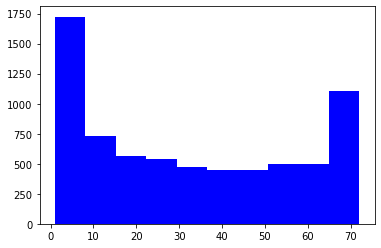

In [304]:
plt.hist(telco['tenure'], color='blue')
plt.show()

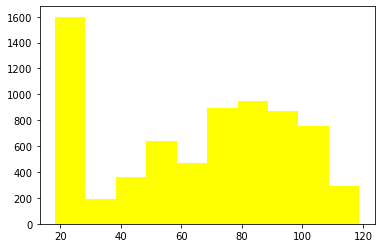

In [303]:
plt.hist(telco['monthly_charges'], color='yellow')
plt.show()

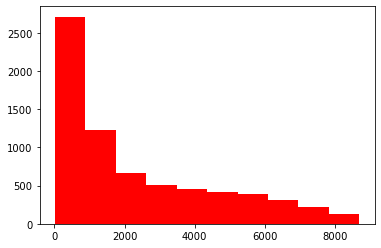

In [306]:
plt.hist(telco['total_charges'], color='red')
plt.show()

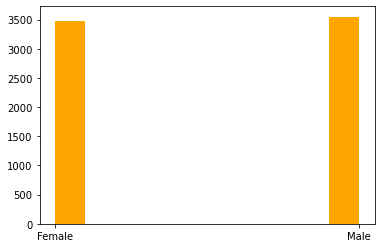

In [307]:
plt.hist(telco['gender'], color='orange')
plt.show()

In [291]:
telco.gender.value_counts(normalize=True)*100

Male      50.469283
Female    49.530717
Name: gender, dtype: float64

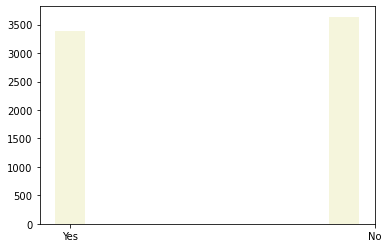

In [296]:
plt.hist(telco['partner'], align='left', color='beige')
plt.show()

In [300]:
telco.partner.value_counts(normalize=True)*100

No     51.749147
Yes    48.250853
Name: partner, dtype: float64

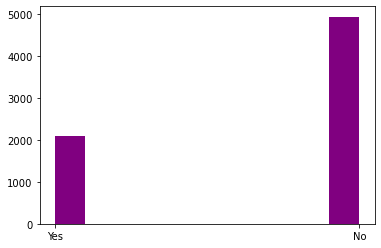

In [367]:
plt.hist(telco['dependents'], color='purple')
plt.show()

In [302]:
telco.dependents.value_counts(normalize=True)*100

No     70.150739
Yes    29.849261
Name: dependents, dtype: float64

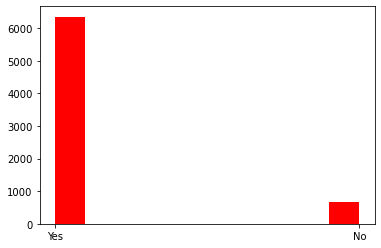

In [308]:
plt.hist(telco['phone_service'], color='red')
plt.show()

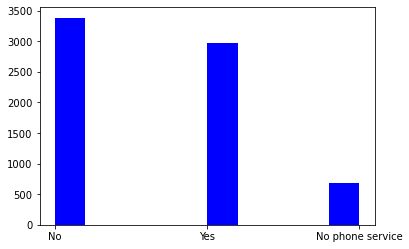

In [343]:
plt.hist(telco['multiple_lines'], color='blue')
plt.show()

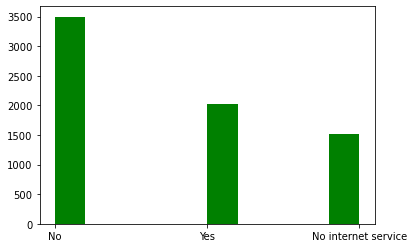

In [344]:
plt.hist(telco['online_security'], color='green')
plt.show()

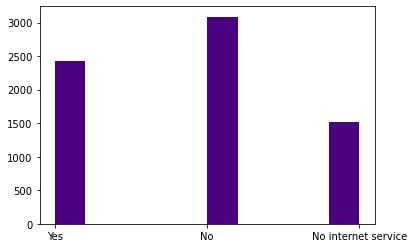

In [345]:
plt.hist(telco['online_backup'], color='indigo')
plt.show()


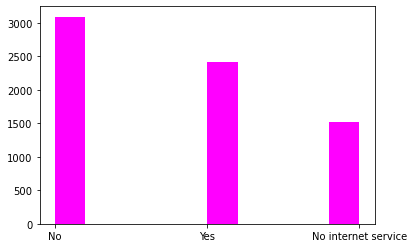

In [310]:
plt.hist(telco['device_protection'], color='fuchsia')
plt.show()


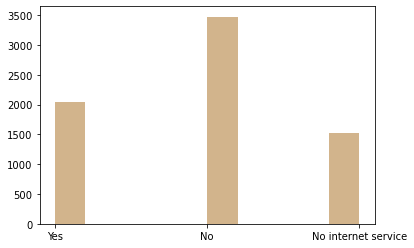

In [311]:
plt.hist(telco['tech_support'], color='tan')
plt.show()


In [362]:
pd.crosstab(telco.tech_support == 'No', telco.tech_support == 'No internet service')

tech_support,False,True
tech_support,,
False,2040,1520
True,3472,0


## Takeaways from crosstab on tech_support column
- 2040 customers have tech_support and have internet services
- 1520 do not have tech_support but have internet services
- 3472 have tech_support but do not have internet services
- 0 have no tech_support and no internet services

**For the purpose of one-hot encoding I do need 'No internet service' because not having internet services does not mean that a customer does not have tech support**

But does that mean that some customers have tech support by mistake and do not need it?

In [ ]:
plt.hist(telco['streaming_tv'], color='yellow')
plt.show()


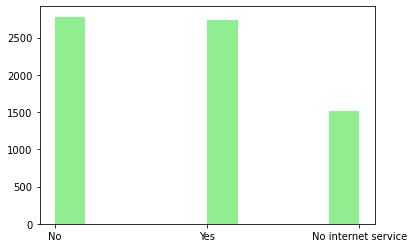

In [320]:
plt.hist(telco['streaming_movies'], color='lightgreen')
plt.show()


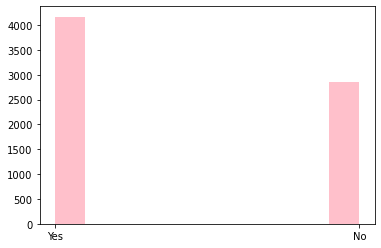

In [318]:
plt.hist(telco['paperless_billing'], color='pink')
plt.show()


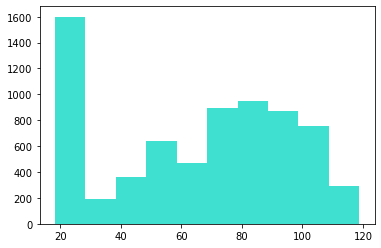

In [317]:
plt.hist(telco['monthly_charges'], color='turquoise')
plt.show()


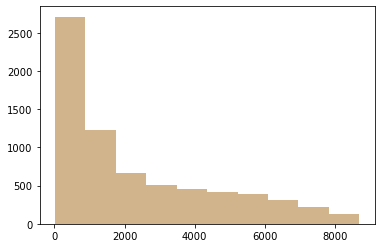

In [316]:
plt.hist(telco['total_charges'], color='tan')
plt.show()


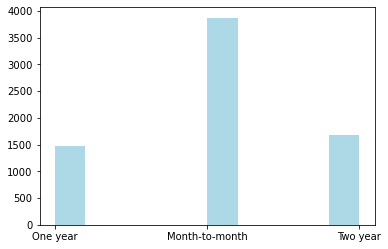

In [315]:

plt.hist(telco['contract_type'], color='lightblue')
plt.show()

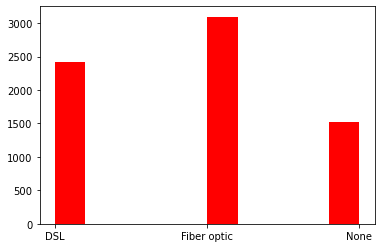

In [313]:
plt.hist(telco['internet_service_type'], color='red')
plt.show()

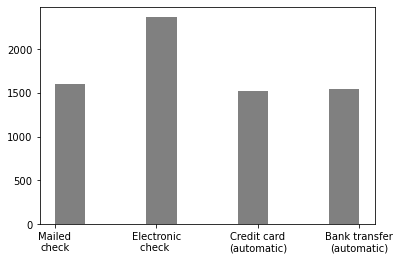

In [333]:
plt.hist(telco['payment_type'], color='grey', )
plt.xticks([0, 1, 2, 3], ['Mailed\ncheck', 'Electronic\ncheck ', 'Credit card\n(automatic)', 'Bank transfer\n(automatic)'])
plt.show()

In [331]:
telco.payment_type.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_type, dtype: int64

In [353]:
telco.payment_type.value_counts(normalize=True)*100

Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: payment_type, dtype: float64

### Takeaways after examining all the columns through a histogram
**All columns contain variables with a significant distribution EXCEPT gender and partner that are pretty evenly distributed**

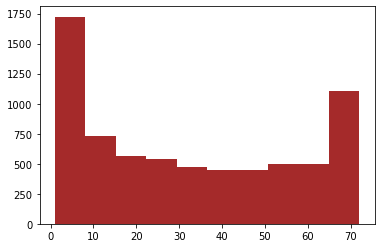

In [341]:
plt.hist(telco['tenure'], color='brown')
plt.show()

<font color='red'>**Tenure column can be binned to match years and maybe the monthly payments as well**</font>

In [86]:
# What is the minimum and maximum values of tenure
min_tenure = telco.tenure.min()
max_tenure = telco.tenure.max()
min_tenure, max_tenure

(0, 72)

In [111]:
# Defining bins size
# bins = [[0,12],(12, 24], (24,36], (36, 48], (48, 60], (60, 72]]

bins = [0, 12, 24, 36, 48, 60, 72]

In [90]:
# Assigning names for the bins
bin_names = ['1year', '2years', '3years', '4years', '5years', '6years']

In [ ]:
pd.cut()

In [258]:
telco['binned_tenure'] = pd.cut(telco['tenure'], bins, labels = bin_names)
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,binned_tenure
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1year
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,1year
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1year
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2years
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1year


In [124]:
# How does the DataFrame registers customers with 0 tenure at telco?
telco.binned_tenure.shape

(7043,)

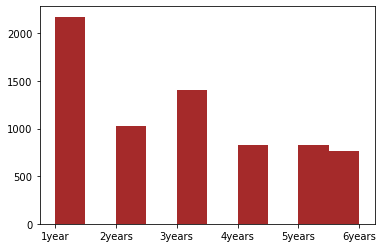

In [342]:
plt.hist(telco['binned_tenure'], color='brown')
plt.xticks([0, 1, 2, 3, 4, 5], ['1year', '2years', '3years', '4years', '5years', '6years'])
plt.show()
# How to plot binned_tenure

In [286]:
# for column in telco: ⚠️
#     plt.hist(telco.binned_tenure, bins = '1year', '2years', '3years', '4years', '5years', '6years')

#     plt.show()

In [ ]:
telco.head()

**Test for encoding data**

In [364]:
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,binned_tenure,gender_encoded
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1year,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,1year,0
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1year,0
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2years,0
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1year,1


In [365]:
dummy_telco = pd.get_dummies(telco[['multiple_lines']])
dummy_telco

,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7038,1,0,0
7039,0,0,1
7040,1,0,0
7041,1,0,0


## Takeaways for preparation

**The column total_charges data type is an object but it should be an integer or a float so this must be added to prepare.py**

**Columns that are potentially significant to customer churn: ALL BUT payment_type_id,
internet_service_type_id, contract_type_id, customer_id**
- I will drop them

**There is no null values in the dataset except for total_charges but it does not appear because they are an object type**

**The columns with _id are duplicates of other columns except for customer_id**

**Monthly charges and tenure seem to be very significant**

**Categorical columns that would need to be one-hot encoded or just converted to numerical (for binary categorical variables):**
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing'
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure'
 
 **Tech support needs more investigation and can be put in 'if I had more time'**
 **Churn is my target variable**
 **Tenure can be binned

<font color="#ca2c92">*After observing the columns and because we are looking for costumers who have churned and I want to build a model that predicts churn, 
my target is going to be the churn column, so it will not be encoded*</font>

## Preparing the data for exploration

### Constructing my prepare file

In [ ]:
# ------------------- TELCO Data Preparation-------------------

# def split_telco_data(df):
#     '''
#     split_telco_data(df) splits telco data, stratify churn.
#     Returns train, validate, and test dfs.
#     '''
#     train_validate, test = train_test_split(df, test_size=.2, 
#                                         random_state=123, 
#                                         stratify=df.churn)
#     train, validate = train_test_split(train_validate, test_size=.3, 
#                                    random_state=123, 
#                                    stratify=train_validate.churn)
#     return train, validate, test

# def prep_telco_data(df):
#       '''
#     prep_telco_data(df) drops columns, transforms data,adds columns
#     to make it ready for splitting and exploration. Some of the columns
#     will be dropped from train, validate, and test because they are still
#     categorical.
#     '''
#     # Drop duplicate columns
#     df.drop(columns=['payment_type_id', \
#                         'internet_service_type_id', \
#                         'contract_type_id', \
#                         'customer_id'], inplace=True)
       
#     # Drop null values stored as whitespace    
#     df['total_charges'] = df['total_charges'].str.strip()
#     df = df[df.total_charges != '']
    
#     # Convert to correct datatype
#     df['total_charges'] = df.total_charges.astype(float)
    
#     # Bin tenure
#     bins = [0, 12, 24, 36, 48, 60, 72]
#     bin_names = ['1year', '2years', '3years', '4years', '5years', '6years']
#     df['binned_tenure'] = pd.cut(telco['tenure'], bins, labels = bin_names)

#     # Convert binary categorical variables to numeric
#     df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
#     df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
#     df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
#     df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
#     df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
#     df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
#     # Get dummies for non-binary categorical variables
#     dummy_df = pd.get_dummies(df[['multiple_lines', \
#                               'online_security', \
#                               'online_backup', \
#                               'binned_tenure', \
#                               'device_protection', \
#                               'tech_support', \
#                               'streaming_tv', \
#                               'streaming_movies', \
#                               'contract_type', \
#                               'internet_service_type', \
#                               'payment_type']], dummy_na=False, \
#                               drop_first=True)
    
#     # Concatenate dummy dataframe to original 
#     df = pd.concat([telco, dummy_df], axis=1)

#     # split the data
#     train, validate, test = split_telco_data(df)
    
#     return train, validate, test

In [366]:
# The prepare function prepare the telco data by performing a split
# that returns train, validate, and test DataFrames, and also stratify the churn column.

# It also drops duplicate columns, null values stored as whitespace
# (customers who probably just joined and have 0 tenure), converts object datatype to float,
# converts binary categorical variables to numeric ones, gets dummies for non-binary categorical variables
# that it concatenates to the original DataFrame.

train, validate, test = prepare.prep_telco_data(telco)

AttributeError: Can only use .str accessor with string values!

In [376]:
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
df

,greenBars,orangeBars,blueBars
0,20.0,5,2
1,1.5,15,15
2,7.0,5,18
3,10.0,10,5
4,5.0,15,10


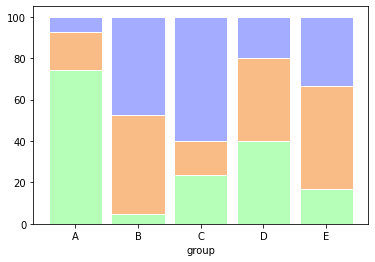

In [372]:
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
df
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

In [ ]:
# # Adding a legend code to the above
#     # Create blue Bars
#     plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="group C")

#     # Custom x axis
#     plt.xticks(r, names)
#     plt.xlabel("group")

#     # Add a legend
#     plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#     # Show graphic
#     plt.show()

In [378]:
train['gender'] == 'churn'

5919    False
1915    False
5054    False
2355    False
6279    False
        ...  
394     False
3763    False
3444    False
1002    False
4192    False
Name: gender, Length: 3937, dtype: bool

In [382]:
def my_function(Who_is_there):
  print("Hiyaaaah!!!!")

my_function()

SyntaxError: invalid syntax (952755100.py, line 1)

In [384]:
def my_function(ga):
  print(ga + " Refsnes")

my_function("Emil")
my_function("Tobias")
my_function("Linus")

Emil Refsnes
Tobias Refsnes
Linus Refsnes


In [4]:
data = pd.read_clipboard()
data

,animal_type,gender,weight,age,state,trained
0,cat,male,10,1,CA,no
1,dog,male,20,4,FL,no
2,dog,male,30,5,NY,no
3,cat,female,40,3,FL,yes
4,cat,female,10,2,NY,yes
5,dog,female,20,4,TX,yes
6,cat,female,50,6,TX,yes
7,dog,male,60,1,CA,no
8,dog,male,70,5,NY,no
9,cat,female,80,4,FL,yes


In [27]:
data.columns

Index(['animal_type', 'gender', 'weight', 'age', 'state', 'trained'], dtype='object')

In [31]:
def frequency(ds, vars):
    if len(vars) > 1:
        c1 = ds[vars[0]]
        c2 = []
        for i in range(1,len(vars)):
            c2.append(ds[vars[i]])
        dfs = []
        dfs.append(pd.crosstab(c1,c2).unstack().reset_index().rename(columns={0:'Count'}))
        dfs.append(pd.crosstab(c1,c2, normalize='all').unstack().reset_index().rename(columns={0:'Percent'}))
        dfs = [df.set_index(vars) for df in dfs]
        df = dfs[0].join(dfs[1:]).reset_index()
        return df

In [37]:
frequency(train, ['gender',
                  'senior_citizen', 
                  'partner',
                  'dependents',
                  'tenure',
                  'phone_service',
                  'multiple_lines',
                  'online_security',
                  'online_backup',
                  'device_protection',
                  'tech_support',
                  'streaming_tv',
                  'streaming_movies',
                  'paperless_billing',
                  'monthly_charges',
                  'total_charges',
                  'churn',
                  'contract_type',
                  'internet_service_type',
                  'payment_type',
                  'binned_tenure'])

,weight,age,Count,Percent
0,10,1,1,0.076923
1,20,1,0,0.000000
2,30,1,0,0.000000
3,40,1,0,0.000000
4,50,1,0,0.000000
5,60,1,1,0.076923
6,70,1,0,0.000000
7,80,1,0,0.000000
8,90,1,0,0.000000
9,100,1,0,0.000000


In [ ]:
def frequency(ds, vars):
    '''frequency takes a dataframe in *arg and a *kwarg in the form of a list of columns
    and return a dataframe with the count and the frequency of the data
    '''
    if len(vars) > 1:
        c1 = ds[vars[0]]
        c2 = []
        for i in range(1,len(vars)):
            c2.append(ds[vars[i]])
        dfs = []
        dfs.append(pd.crosstab(c1,c2).unstack().reset_index().rename(columns={0:'Count'}))
        dfs.append(pd.crosstab(c1,c2, normalize='all').unstack().reset_index().rename(columns={0:'Percent'}))
        dfs = [df.set_index(vars) for df in dfs]
        df = dfs[0].join(dfs[1:]).reset_index()
        return df

In [ ]:
y_ = best_depth.predict(X_test)
y_proba = best_depth.predict_proba(X_test)

predictions = pd.DataFrame({
    "customer_id": test.customer_id,
    "prediction": y_predictions,
    "probability_of_churn": y_proba
})

predictions.to_csv("predictions.csv")

In [ ]:
TP = 265
TN = 133
FP = 42
FN = 58

True_positive_rate = TP/TP+TN
True_negative_rate = TN/TN+FP
False_positive_rate = FP/FP+TN
False_negative_rate = FN/FN+TP

Precision = TP/(TP+FP)
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
F1_score = 2 * (Precision*Recall)/(Precision*Recall)
Support_0 = TP + FN
Suppport_1 = FP + TN

print(f'True_positive_rate: {True_positive_rate}')
print(f'True_negative_rate: {True_negative_rate}')
print(f'False_positive_rate: {False_positive_rate}')
print(f'False_negative_rate: {False_negative_rate}\n')
print('============================\n')
print(f'Precision: {Precision}')
print(f'Accuracy: {Accuracy}')
print(f'Recall: {Recall}')
print(f'F1_score: {F1_score}')
print(f'Support_0: {Support_0}')
print(f'Suppport_1: {Suppport_1}')

In [39]:
has_churned = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [41]:
a = pd.DataFrame(has_churned)
a

,0
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [ ]:
pd.crosstab(a.actual, df.prediction)


In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df = pd.DataFrame({
    'actual': ['coffee', 'no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'coffee'],
    'prediction': ['no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'no coffee'],
})
df

,actual,prediction
0,coffee,no coffee
1,no coffee,no coffee
2,no coffee,coffee
3,coffee,coffee
4,coffee,coffee
5,coffee,coffee
6,no coffee,no coffee
7,coffee,no coffee


In [47]:
pd.crosstab(df.actual, df.prediction)


prediction,coffee,no coffee
actual,,
coffee,3,2
no coffee,1,2


In [48]:
confusion_matrix(df.actual, df.prediction,
                 labels = ('no coffee', 'coffee'))

array([[2, 1],
       [2, 3]])

In [49]:
df['baseline_prediction'] = 'coffee'
df

,actual,prediction,baseline_prediction
0,coffee,no coffee,coffee
1,no coffee,no coffee,coffee
2,no coffee,coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee
6,no coffee,no coffee,coffee
7,coffee,no coffee,coffee


In [50]:
subset = df[df.actual == 'coffee']
subset

,actual,prediction,baseline_prediction
0,coffee,no coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee
7,coffee,no coffee,coffee


In [ ]:

model_recall = (subset.prediction == subset.actual).mean()
baseline_recall = (subset.baseline_prediction == subset.actual).mean()

print(f'   model recall: {model_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')


In [4]:
purchase_outcome = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0]

In [5]:
purchase = pd.DataFrame({'baseline':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'prediction':[1, 1, 0, 0, 1, 1, 0, 0, 0, 0]})
purchase

,baseline,prediction
0,1,1
1,1,1
2,1,0
3,1,0
4,1,1
5,1,1
6,1,0
7,1,0
8,1,0
9,1,0


In [7]:
pd.crosstab(purchase.baseline, purchase.prediction)

prediction,0,1
baseline,,
1,6,4


In [15]:
purchase['baseline_prediction'] = '1'

In [16]:
purchase

,baseline,prediction,baseline_prediction
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,1
4,1,1,1
5,1,1,1
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


In [18]:
model_accuracy = (purchase.prediction == purchase.baseline).mean()
baseline_accuracy = (purchase.baseline == purchase.baseline).mean()

print(f'   model accuracy: {model_accuracy:}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')

   model accuracy: 0.4
baseline accuracy: 100.00%
